# Predict Restaurant Menu Items Profitability

## About Dataset
### Overview:
This dataset provides insights into restaurant menu optimization, aiming to maximize profitability by analyzing menu item categories, ingredients, prices, and profitability indicators.

### Variables:
* **RestaurantID**: Identifier of the restaurant.
* **MenuCategory**: Category of the menu item (Appetizers, Main Course, Desserts, Beverages).
* **MenuItem**: Name of the menu item.
* **Ingredients**: List of ingredients used in the menu item (confidential data included for beverages).
* **Price**: Price of the menu item in dollars (rounded to two decimal places).
* **Profitability**: Target variable indicating menu item profitability (High/Medium/Low).

In [61]:
#import libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [123]:
# Load dataset 
df = pd.read_csv('Dataset/restaurant_menu_optimization_data.csv')
df.head(5)

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [ ]:
# relaion between price & profitability 
# disturbution of profitability with MenueCategory (using countplot)
# relation between menuecategory & price & profitability (using barchart) 
# 

# EDA

In [18]:
df.shape

(1000, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [124]:
# check duplicated data
df.duplicated().sum()

27

In [125]:
# drop duplicates values 
df.drop_duplicates(inplace = True)

In [16]:
# check missing values 
df.isnull().sum().all()

False

In [30]:
## check unique values of categorical data
cols = ['RestaurantID' , 'MenuCategory' , 'MenuItem' , 'Ingredients', 'Profitability']

for col in cols: 
    print(f'Unique values of {col}: {df[col].unique()} ')
    print(' ')

Unique values of RestaurantID: ['R003' 'R001' 'R002'] 
 
Unique values of MenuCategory: ['Beverages' 'Appetizers' 'Desserts' 'Main Course'] 
 
Unique values of MenuItem: ['Soda' 'Spinach Artichoke Dip' 'New York Cheesecake' 'Chicken Alfredo'
 'Grilled Steak' 'Stuffed Mushrooms' 'Tiramisu' 'Lemonade'
 'Chocolate Lava Cake' 'Iced Tea' 'Coffee' 'Bruschetta'
 'Vegetable Stir-Fry' 'Shrimp Scampi' 'Fruit Tart' 'Caprese Salad'] 
 
Unique values of Ingredients: ["['confidential']" "['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']"
 "['Chocolate', 'Butter', 'Sugar', 'Eggs']"
 "['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Parmesan']"] 
 
Unique values of Profitability: ['Low' 'Medium' 'High'] 
 


## Let's get the pie plot of each categorical feature 

In [64]:

def pie_plot(col):
    
    pallete_color = sns.color_palette('Set2')
    df[col].value_counts().plot.pie(y=col ,autopct='%1.0f%%',colors = pallete_color , figsize=(6,6));
    plt.title(f'Pie plot of {col}')
    

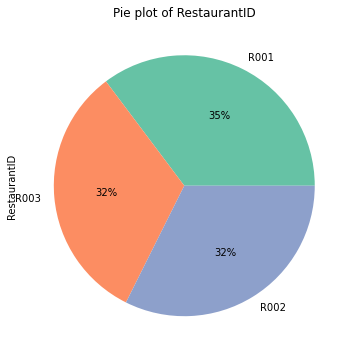

In [65]:
## RestaurantID
figsize=(12, 6)
pie_plot('RestaurantID')


* plot indicates that there are **close proportions** among IDS

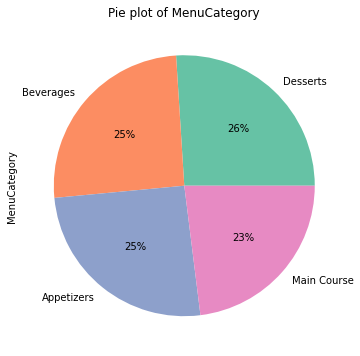

In [66]:
## MenuCategory
figsize=(12, 6)
pie_plot('MenuCategory')

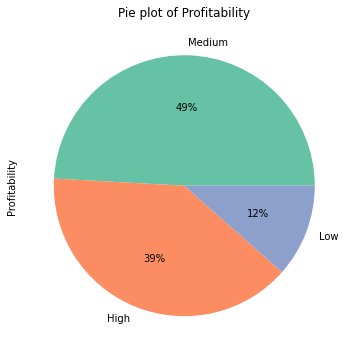

In [77]:
##Profitability
figsize=(12, 6)
pie_plot('Profitability')

* **49%** of resturant menue items profitability is **medium**, **39%** high and the other is low 

### Count plot of  Menu Category & Menu Items: 

Text(0.5, 1.0, 'Bar plot of MenuCategory')

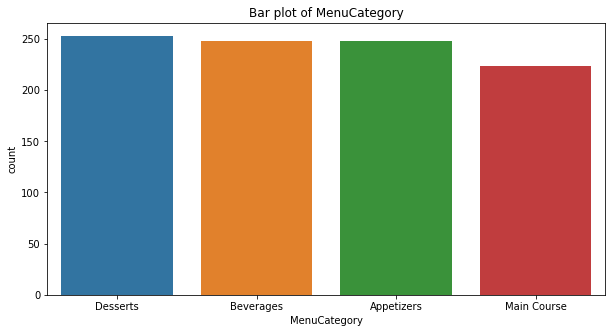

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x ='MenuCategory', order = df['MenuCategory'].value_counts().index)
plt.title('Bar plot of MenuCategory')

Text(0.5, 1.0, 'Bar plot of MenuItem')

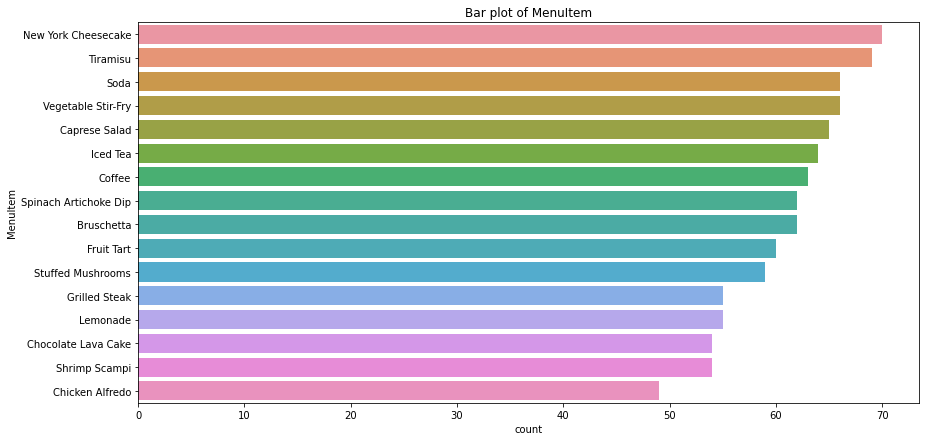

In [81]:
## MenuItem

plt.figure(figsize=(14,7))
sns.countplot(data = df, y ='MenuItem', order = df['MenuItem'].value_counts().index)
plt.title('Bar plot of MenuItem')

* **New York Cheesecake** is the most items that has been ordered. 

In [75]:
df.groupby('MenuItem')['Ingredients'].value_counts()

## the ingredients of all items 

MenuItem               Ingredients                                           
Bruschetta             ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']              62
Caprese Salad          ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']              65
Chicken Alfredo        ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Parmesan']    49
Chocolate Lava Cake    ['Chocolate', 'Butter', 'Sugar', 'Eggs']                  54
Coffee                 ['confidential']                                          63
Fruit Tart             ['Chocolate', 'Butter', 'Sugar', 'Eggs']                  60
Grilled Steak          ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Parmesan']    55
Iced Tea               ['confidential']                                          64
Lemonade               ['confidential']                                          55
New York Cheesecake    ['Chocolate', 'Butter', 'Sugar', 'Eggs']                  70
Shrimp Scampi          ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Parmesan']    5

### Disturbution of Distribution of Menue Items  with Menue Category :

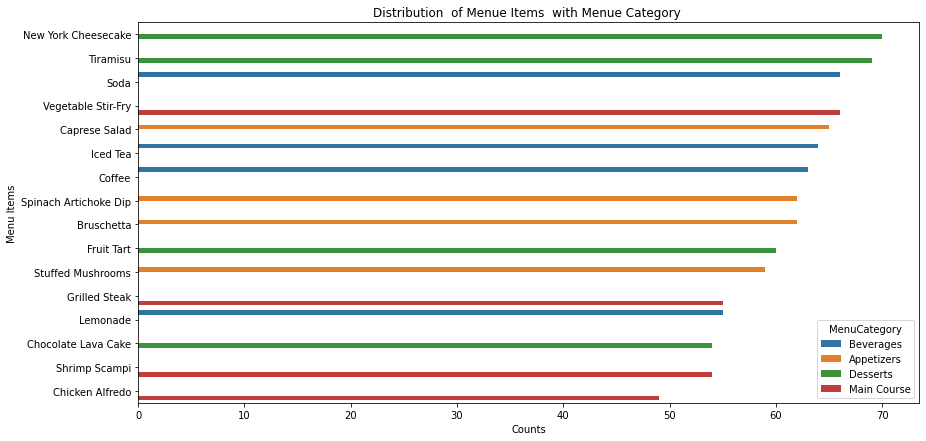

In [93]:
plt.figure(figsize=(14, 7))
sns.countplot(y='MenuItem', order=df['MenuItem'].value_counts().index, data=df, 
              hue='MenuCategory')

plt.ylabel('Menu Items')
plt.xlabel('Counts')
plt.title('Distribution  of Menue Items  with Menue Category ')
plt.show()

#### The plot above explains that: 
* **1-** there are 4 items from **deserts (cheesecake, traumesiu, fruit tart, chocolate lava cake)**, 4 from **Beverages (soda, iced tea, coffee, lemonda)**, 4 from **Main course (vegetable stir fry, Grilled steak, shrimp scampi, chicken Alferido)** and 4  from **Apetizers (Caprese Salad, Spinach Dip, Bruschetta, stuffed mushroom)** .

* **2-** cheese **cake & tramesu** are most ordered items in deserts and also in all items, **soda** is the most one in beverages, **vegetable stir fry** in main course and caprese salad in Aprtizerse . 

### Distribution of Menue Category with Resturant ID: 

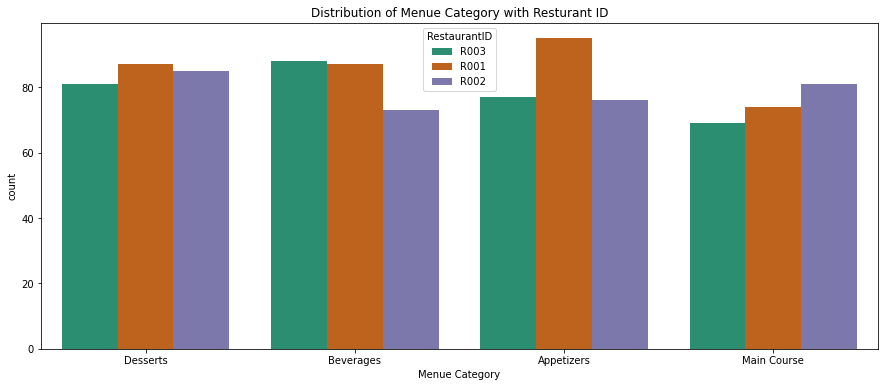

In [96]:
plt.figure(figsize=(15, 6))
sns.countplot(x='MenuCategory', order=df['MenuCategory'].value_counts().index, data=df, hue='RestaurantID', palette='Dark2')
plt.title('Distribution of Menue Category with Resturant ID')
plt.xlabel('Menue Category')
plt.show()

###  Relaion Among Item Price & Resturant Profitability & Menue Category : 

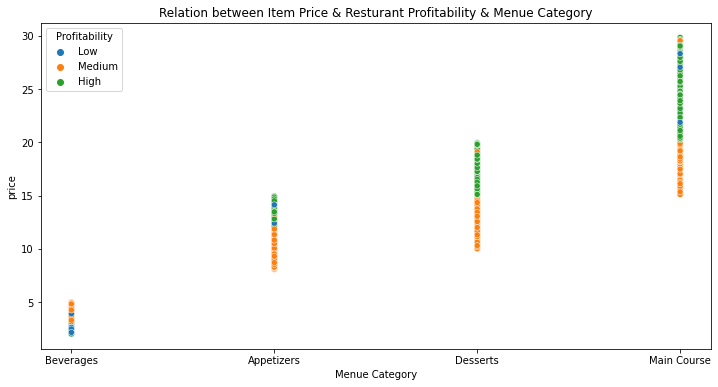

In [113]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='MenuCategory', y='Price' , hue = 'Profitability' )
plt.title('Relation between Item Price & Resturant Profitability & Menue Category')
plt.xlabel('Menue Category')
plt.ylabel('price')
plt.show()

* This indicates that Beverages is the least price and it has medium and low profitability, then Appetizers, Deserts and Main Course. 

### Disturbution of Price: 

Text(0.5, 1.0, 'Disturbution of Price')

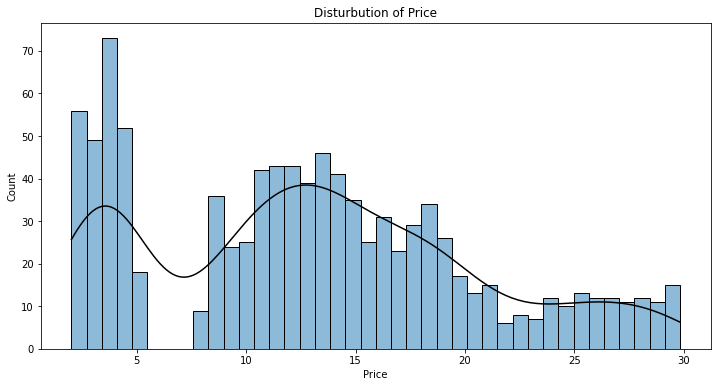

In [117]:
plt.figure(figsize=(12, 6))
bmi_hist = sns.histplot(df['Price'] ,bins=40, kde=True)
bmi_hist.lines[0].set_color('black')
plt.title('Disturbution of Price')

# Data Preprocessing

In [119]:
df.head(4)

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High


## Handling Categorical feature: 

In [127]:
## we will convert Resturant ID into one hot encoding
dummies = pd.get_dummies(df['RestaurantID'], sparse=True)
df = pd.concat([dummies,df] , axis =1)


In [129]:
df.drop('RestaurantID' , axis = 1 , inplace = True)

In [131]:
## we will convert  MenuCategory into one hot encoding
dummies = pd.get_dummies(df['MenuCategory'], sparse=True)
df = pd.concat([dummies,df] , axis =1)

In [133]:
df.drop('MenuCategory' , axis = 1 , inplace = True)

In [135]:
## converting of MenuItem to label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['MenuItem'] = label_encoder.fit_transform(df['MenuItem'])

In [137]:
#drop ingredients column:
df.drop('Ingredients' , axis=1 , inplace = True)

In [139]:
## profitability Handling 
Profitability_wrapper = {'Low':0 ,  'Medium':1 , 'High':2}
df['Profitability'] = df['Profitability'].replace(Profitability_wrapper)

In [140]:
df

,Appetizers,Beverages,Desserts,Main Course,R001,R002,R003,MenuItem,Price,Profitability
0,0,1,0,0,0,0,1,11,2.55,0
1,1,0,0,0,1,0,0,12,11.12,1
2,0,0,1,0,0,0,1,9,18.66,2
3,0,0,0,1,0,0,1,2,29.55,2
4,0,0,0,1,0,1,0,6,17.73,1
...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1,11,2.16,0
996,1,0,0,0,1,0,0,1,11.86,1
997,0,0,0,1,0,0,1,15,20.57,2
998,0,0,1,0,0,1,0,14,18.80,2


# Train & test split data

In [143]:
X = df.drop('Profitability' , axis = 1)
Y = df['Profitability']

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3 , stratify= Y, random_state = 20 , shuffle = True)

# Training Top Models 

### SVC

In [169]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , mean_squared_error, r2_score
SVC = SVC(kernel = "linear") 
SVC.fit(X_train , y_train)

svc_pred = SVC.predict(X_test)

#calculate accuracy
SVC_accuracy = accuracy_score(y_test , pred)
    confusion
 #calculate  matrix 
cm_svc = confusion_matrix(y_test , pred)
mse_svc = mean_squared_error(y_test, svc_pred)
r2_svc = r2_score(y_test, svc_pred)

print(f'svc accuracy : {SVC_accuracy*100}%')
print(f'svc confusion matrix: ')
print(cm)
print(f'Mean square error: {mse_svc}')
print(f'R2 svc: {r2_svc * 100}%')

svc accuracy : 82.53424657534246%
svc confusion matrix: 
[[  0  29   5]
 [  0 136   7]
 [  0  10 105]]
Mean square error: 0.22602739726027396
R2 svc: 47.83879611335157%


C:\Users\CPU\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\CPU\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


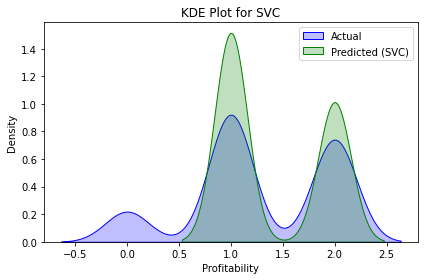

In [161]:
# Plot KDE for Gradient Boosting Regressor
sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
sns.kdeplot(svc_pred, label='Predicted (SVC)', color='green', fill=True)
plt.title('KDE Plot for SVC')
plt.xlabel('Profitability')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

### RandomForest Classifier

In [171]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier 

random = RandomForestClassifier(n_estimators=1 , random_state=0)
random.fit(X_train , y_train)
Random_pred = random.predict(X_test)

 #calculate accuracy
Random_accuracy = accuracy_score(y_test , Random_pred)
    
 #calculate confusion matrix 
cm_rf = confusion_matrix(y_test , Random_pred)
mse_rf = mean_squared_error(y_test, Random_pred)
r2_rf = r2_score(y_test, Random_pred)
print(f'randomforest accuracy : {Random_accuracy*100}%')
print(f'randomforest confusion matrix: ')
print(cm_rf)
print(f'MSE RandomForest: {mse_rf}')
print(f'R2 RandomForest: {r2_rf * 100}%')

randomforest accuracy : 85.61643835616438%
randomforest confusion matrix: 
[[ 22   7   5]
 [  2 126  15]
 [  6   7 102]]
MSE RandomForest: 0.2568493150684932
R2 RandomForest: 40.72590467426315%


C:\Users\CPU\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\CPU\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


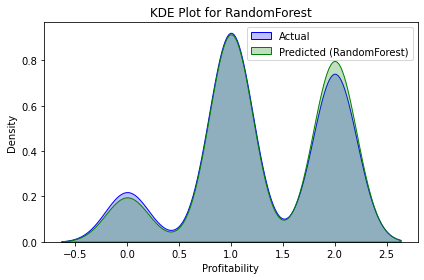

In [162]:
# Plot KDE for RandomForest
sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
sns.kdeplot(Random_pred, label='Predicted (RandomForest)', color='green', fill=True)
plt.title('KDE Plot for RandomForest')
plt.xlabel('Profitability')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

### GradientBoosting 

In [157]:
Gradientboosting = GradientBoostingClassifier(n_estimators=1 , random_state=0)

Gradientboosting.fit(X_train , y_train)
Gradient_pred = Gradientboosting.predict(X_test)

gradient_accuracy = accuracy_score(y_test , Gradient_pred)
 #calculate confusion matrix 
cm = confusion_matrix(y_test , Gradient_pred)

print(f'GradientBoosting accuracy : {gradient_accuracy*100}%')
print(f'GradientBoostin confusion matrix: ')
print(cm) 


svc accuracy : 61.64383561643836%
svc confusion matrix: 
[[  0  32   2]
 [  0 140   3]
 [  0  75  40]]


C:\Users\CPU\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\CPU\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


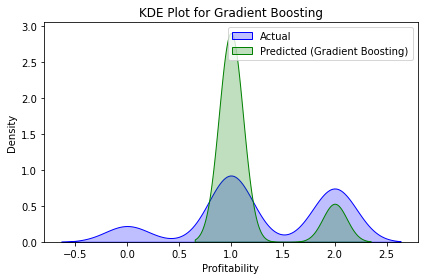

In [163]:
# Plot KDE for Gradient Boosting Regressor
sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
sns.kdeplot(Gradient_pred, label='Predicted (Gradient Boosting)', color='green', fill=True)
plt.title('KDE Plot for Gradient Boosting')
plt.xlabel('Profitability')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

### KNeighborsClassifier

In [187]:
from sklearn.neighbors import KNeighborsClassifier

KNeighbors = KNeighborsClassifier(n_neighbors = 1) 
KNeighbors.fit(X_train , y_train)
KNN_pred = KNeighbors.predict(X_test)

KNN_accuracy = accuracy_score(y_test , KNN_pred)

 #calculate confusion matrix 
KNN_cm = confusion_matrix(y_test , KNN_pred)
print(f'Kneighbors accuracy : {KNN_accuracy*100}%')
print(f'Kneighbors confusion matrix: ')
print(KNN_cm) 


Kneighbors accuracy : 85.61643835616438%
Kneighbors confusion matrix: 
[[ 22   6   6]
 [  6 123  14]
 [  3   7 105]]


C:\Users\CPU\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\CPU\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


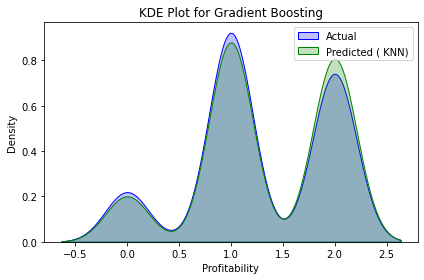

In [173]:
# Plot KDE for Kneighbors Classifier 
sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
sns.kdeplot(KNN_pred, label='Predicted ( KNN)', color='green', fill=True)
plt.title('KDE Plot for Gradient Boosting')
plt.xlabel('Profitability')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

In [188]:
model_comparison = pd.DataFrame({
    'Model': ['SVC', 'RandomForest', 'Gradient Boosting', 'Kneighbors'],
    'Accuracy': [SVC_accuracy, Random_accuracy, gradient_accuracy, KNN_accuracy]
})

model_comparison

,Model,Accuracy
0,SVC,0.825342
1,RandomForest,0.856164
2,Gradient Boosting,0.616438
3,Kneighbors,0.856164


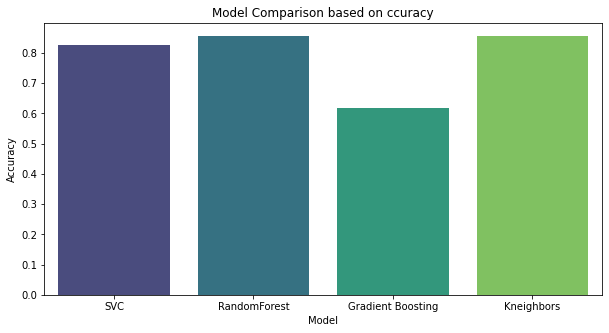

In [189]:
# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=model_comparison, palette="viridis")
plt.title('Model Comparison based on ccuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()